# <center>Computational Physics</center>

# <center>Midterm Exam 2019-2020-2</center>

## Instructions:
- Please downloand the `CP_midexam_2019-2020-2.pdf` and `CP_name_ID_midexam.ipynb`. 
- You shall include the **code** of the selected problems in the file and submit it before the due time.
- You are required to write your name and student ID in the **filename**.
- Please read the problems carefully and follow the instructions before you start to solve them. 
- Please write your solutions on the exam paper and submit the copy of it before the due time. You are required to **write your name and student ID on each piece of exam paper**.
- You are required to turn on your video throughout the exam.

### Problem 1   (20 points) 

The value of $\pi$ can be calculated with the series: 
$$
\pi = 4 \sum\limits_{n=1}^{\infty}\left(-1\right)^{n-1}\frac{1}{2n - 1}=4\left(
1-\frac{1}{ 3}+\frac{1}{ 5}-\frac{1}{ 7}+\frac{1}{9}-\frac{1}{11}+\cdots\right)
$$
(1) Describe your algorithm that calculates the value of $\pi$. Discuss the possible  sources of errors. How can you minimize the errors when you design your algorithm?      
(2) Write a program to implement your algorithm and calculate the value of $\pi$ with five decimal points.      
(3) Use the program to calculate $\pi$ and the true relative error for: $n = 10, 20, 40,100, 200$.     
(4) Make a $\log-\log$ plot of the results from part (3).     
**You need to submit your code for part (2) - (4)!**

(1) 我采用一正一负两两合并再从小到大累加的方法。由于是从小到大累加，我首先根据设定的误差，估计一个最大迭代轮次，然后使用for循环，累加各项。误差主要来自于截断误差（只考虑有限项）与舍入误差（计算机精度限制）。我才用从小加到大与两两合并的方式来减少舍入误差，并估计一个尽量大的累加轮次来减少截断误差。

In [106]:
# (2)
import numpy as np 
def GetPi(eps, max_rd=None):
    # since error ~ 4 / (4N+1)
    if max_rd == None:
        N = int((4 / eps))
    else:
        N = max_rd

    rd = 0
    sum_pi = 0
    for i in np.linspace(N, 0, N+1):
        sum_pi += 4 / (4*i + 1) - 4 / (4*i + 3)

    return sum_pi

print(f"(2)Pi value: {GetPi(1e-5):.7f}")

(2)Pi value: 3.1415914


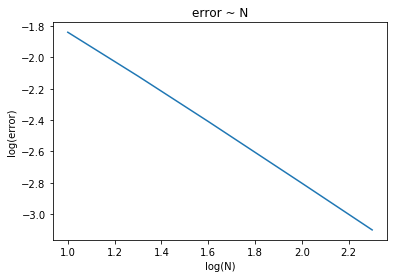

In [107]:
# (3) and (4)
import matplotlib.pyplot as plt
N = [10, 20, 40, 100, 200]
error = []

for n in N:
    cal_pi = GetPi(1e-5, n)
    error.append(abs(cal_pi - np.pi) / np.pi)


plt.figure()
plt.plot(np.log10(N), np.log10(error))
plt.title("error ~ N")
plt.xlabel("log(N)")
plt.ylabel("log(error)")
plt.show()

### Problem 2 (10 points) 
Consider a linear $2\times 2$ system (with unknowns $x_1$ and $x_2$) described by
$$
\begin{pmatrix}
\varepsilon & 1\\
1 & 1
\end{pmatrix}
\begin{pmatrix}
x_1\\x_2\end{pmatrix}
=\begin{pmatrix}
2\\
1
\end{pmatrix}
$$
where $\epsilon > 0$ is a very small constant.   
(1) Solve by Gauss elimination without partial pivoting by hand.   
(2) Solve by Gauss elimination with partial pivoting by hand.    
(3) Compare the results and discuss their validity.  

(1) 不用pivoting：
$$
\begin{pmatrix}
\varepsilon & 1\\
0 & 1-\varepsilon
\end{pmatrix}
\begin{pmatrix}
x_1\\x_2
\end{pmatrix}
=
\begin{pmatrix}
2\\
2-\varepsilon
\end{pmatrix}
$$
解得：
$$ 
x_2=\frac{2-\varepsilon}{1-\varepsilon}
$$
$$ 
x_1=\frac{-1}{1-\varepsilon}
$$

(2) 使用pivoting：
$$
\begin{pmatrix}
1 & \varepsilon\\
1 & 1
\end{pmatrix}
\begin{pmatrix}
x_2\\x_1
\end{pmatrix}
=
\begin{pmatrix}
2\\
2-\varepsilon
\end{pmatrix}
$$
$$
\begin{pmatrix}
1 & \varepsilon\\
1 & 1-\varepsilon
\end{pmatrix}
\begin{pmatrix}
x_2\\x_1
\end{pmatrix}
=
\begin{pmatrix}
2\\
-1
\end{pmatrix}
$$
解得：
$$ 
x_1=\frac{-1}{1-\varepsilon}
$$
$$ 
x_2=\frac{2-\varepsilon}{1-\varepsilon}
$$


(3) 比较：

如果是解析计算，两者能得到完全相同的结果，但如果是计算机浮点运算，不使用pivoting会带来较大的舍入误差，尤其是从上三角矩阵解$x_2$时，有两次大数减小数的情况，并且相除后，得到大数，会有很大的误差。

### Problem 3 (20 points)   
Halley's method to find the solution to a equation of single variable is given as
$$
x_{n+1}=x_{n}-\frac{2f(x_n)f^\prime(x_n)}{2(f^\prime(x_n))^2-f(x_n)f^{\prime\prime}(x_n)}
$$
Apply Halley's method to solve $f(x)=e^{x-3}+x-2$.   
(1) Show that Halley's method has an order of convergence 3 for simple zero.    
(2) Make a sketch of the function $f(x)$ on paper.    
(3) Write the code to determine the root numerically and count the steps of iterations. The predefined tolerance is given as $\left\vert x_{i+1}-x_i\right\vert\leq 0.5e-8$.      
(4) Write your results of part (3) on paper.     
(5) What are the advantages and disadvantages of Halley's method, when you compare it to the Newton's method and the bisection method?    
**You need to submit your code of part (3)!**

(1) 收敛率：
定义
$$g(x)=x-\frac{2f(x)f^\prime(x)}{2(f^\prime(x))^2-f(x)f^{\prime\prime}(x)}$$
，有
\begin{aligned}
g^\prime(x)&=1-\frac{2(f^{\prime 2}(x)+f(x)f^{\prime\prime}(x))(2(f^\prime(x))^2-f(x)f^{\prime\prime}(x)) - 2f(x)f^\prime(x)(3f^\prime(x)f^{\prime\prime}(x)-f(x)f^{\prime\prime\prime}(x))}{(2(f^\prime(x))^2-f(x)f^{\prime\prime}(x))^2}  
&=\frac{2f^2(x)f^{\prime 2}(x) - 2f^2(x)f^\prime(x)f^{\prime\prime\prime}(x)}{(2(f^\prime(x))^2-f(x)f^{\prime\prime}(x))^2}
&=f^2(x)h(x)
\end{aligned}
这里$h(x)$是$f(x)$及其导函数的函数。$g(x)$的二阶导数：
$$
g^{\prime\prime}=2f(x)f^\prime(x)h(x)+f^2(x)h^\prime(x)
$$
显然，在函数零点$x^*$处，$f(x^*)=0$，因此$g^\prime(x^*)=0$，$g^{\prime\prime}(x^*)=0$。
在$x~x^*$处展开$g(x)$：
\begin{aligned}
g(x_n)&=g(x^*)+\frac{1}{6}g^{\prime\prime\prime}(x^*)(x_n-x^*)^3
x_{n+1}&=x^*+\frac{1}{6}g^{\prime\prime\prime}(x^*)(x_n-x^*)^3
\end{aligned}
计算收敛率：
$$
\frac{x_{n+1}-x^*}{(x_n-x^*)^3}=\frac{1}{6}g^{\prime\prime\prime}(x^*)
$$
即收敛率为3。

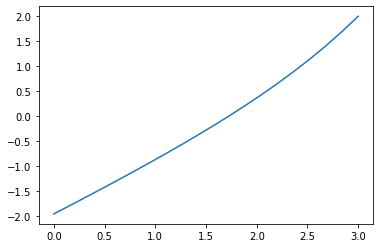

In [108]:
# (2)
import matplotlib.pyplot as plt 
import numpy as np 

f = lambda x: np.exp(x-3) + x - 2
x_plt = np.linspace(0, 3, 20)
plt.figure()
plt.plot(x_plt, f(x_plt))
plt.show()

In [109]:
# (3)
def HalleyMethod(f, f_p, f_pp, x_init=0, eps=0.5e-8, max_rd=100):
    error = 999
    x_last = x_init
    x = x_init
    for rd in range(max_rd):
        x = x - (2*f(x)*f_p(x)) / (2*f_p(x)**2 - f(x)*f_pp(x))
        error = abs(x - x_last)
        x_last = x
        if error <= eps:
            print(f"find root: {x:.10f} in {rd} steps")
            break
f_p = lambda x: np.exp(x-3) + 1
f_pp = lambda x: np.exp(x-3)

HalleyMethod(f, f_p, f_pp)

find root: 1.7215354572 in 3 steps


(5) 优点：收敛速度相比其他两种方法更快
缺点：需要计算一阶，两阶导数，只适用于可以求两阶导数的函数。牛顿法只需要求一阶导数，二分法只需要是一个连续函数，比较普适。

### Problem 4 (20 points)
Consider the following equations corresponding to measurements of two unknown quantities $(x_1,x_2)$
$$
\begin{aligned}
    7x_1 −3x_2& = 5\\
−2x_1 + 5x_2 &= −10\\
    3x_1 &= 8
\end{aligned}
$$
where $x_1$ and $x_2$ are scalars.   
(1) Write these equations as a single matrix-vector equation.       
(2) What `python` package will you apply to determine the least-squares solution?  Please write your code and the results on the paper.   
(3) What numerical method will you apply to determine the least-squares solution? Please describe your method briefly and write the corresponding pseudocode on the paper.   
(4) When you plug your solution into the equations, are any of the equalities satisfied? Why or why not?  

(1)
$$
\begin{pmatrix}
7 & -3 \\
-2 & 5 \\ 
0 & 3
\end{pmatrix}
\begin{pmatrix}
x_1 \\
x_2
\end{pmatrix}
=
\begin{pmatrix}
5 \\
-10 \\
8
\end{pmatrix}
$$

(2) 我使用'numpy.linalg.solve'来解最小二乘法方程，并用'scipy.optimize.curve_fit'验证结果：

In [110]:
import numpy as np 
A = np.mat([[7, -3], [-2, 5], [0, 3]])
b = np.mat([[5], [-10], [8]])

x = np.linalg.solve(A.T * A, A.T * b)
print("Least squares solution:\n", x)

Least squares solution:
 [[ 0.83004552]
 [-0.35508346]]


In [111]:
from scipy.optimize import curve_fit
f_A = lambda para, x1, x2: para[0] * x1 + para[1] * x2
b = [5, -10, 8]
x, _ = curve_fit(f_A, A.T, b)
print("For comparation:\nScipy curve_fit result:", x)

For comparation:
Scipy curve_fit result: [ 0.83004552 -0.35508346]


(3) 我使用变换主元的高斯消元法解线性方程组：$A^T A x=A^T b$

In [112]:
def pivoting(A, n=None):
    # input n as matrix A's actual size
    size = np.shape(A)[0]
    if n == None:
        n = size
    Per = np.mat(np.eye(n))
    max_row_elem = np.array(np.max(A, axis=1))
    best_pivot = np.argmax(np.array(A[:, 0]) / max_row_elem)
    if best_pivot == 0:
        return Per
    Per[n - size][n - size] = 0
    Per[n - size][best_pivot] = 1
    Per[best_pivot][best_pivot] = 0
    Per[best_pivot][n - size] = 1
    return Per    

In [113]:
def Gauss_solve(A_, b_):
    A = np.mat(A_)
    b = np.mat(b_)
    size = np.shape(A)[0]
    result = np.zeros(size)
    for i in range(size-1):
        Per = pivoting(A, size)
        A = Per * A
        b = Per * b
        for j in range(i+1, size):
            fact = A[j, i] / A[i, i]
            A[j, :] -= fact * A[i, :]
            b[j] -= fact * b[i]
            
    result[size-1] = b[size-1] / A[size-1, size-1]
    for i in range(size-1, 0, -1):
        for j in range(i):
            fact = A[j, i] / A[i, i]
            A[j, i] = 0
            b[j] -= fact * b[i]
        result[i-1] = b[i-1] / A[i-1, i-1]
    
    return result

In [114]:
A = np.mat([[7, -3], [-2, 5], [0, 3]])
b = np.mat([[5], [-10], [8]])
print("Gauss solve result:", Gauss_solve(A.T * A, A.T * b))

Gauss solve result: [ 0.83004552 -0.35508346]


### Problem 5 (15 points)    
It is required to fit a regression model of the form $z =f (x,y)$ to the following data:
  
   |   |   |   |   |   |  |  |  |  |   |
   | ---- | ----- | ----- | ----- | ---- | ---- | ---- | ---- | ---- | ---- |
     | $x$  | 0.5   | 1.0   | 1.0   | 2.0  | 2.5  | 2.0  | 3.0  | 3.5  | 4.0  |
   | $y$  | 2.0   | 4.0   | 5.0   | 2.0  | 4.0  | 5.0  | 2.0  | 4.0  | 5.0  |
   | $z$  | -0.19 | -0.32 | -1.00 | 3.71 | 4.49 | 2.48 | 6.31 | 7.71 | 9.51 |
   (1) Describe the algorithm of normal equations to generate a model of the form $z =a+bx+cy$  
   (2) Derive the symmetrical matrix $A$ and the vector $b$ based on part (1) and write the results.  
   (3) Use `python` package to determine the numerical solutions of the parameters $a$, $b$ and $c$.  Write your code on paper.  
   (4) Determine the reduced $\chi^2$. Do you consider the model a good fit to the data? Why and why not?

In [115]:
import numpy as np
x = np.array([0.5, 1.0, 1.0, 2.0, 2.5, 2.0, 3.0, 3.5, 4.0])
y = np.array([2.0, 4.0, 5.0, 2.0, 4.0, 5.0, 2.0, 4.0, 5.0])
z = np.array([-0.19, -0.32, -1.00, 3.71, 4.49, 2.48, 6.31, 7.71, 9.51])

In [126]:
# (1)
size = np.shape(x)
M = np.mat(np.transpose([np.ones(size), x, y]))
b = np.mat(np.reshape(z, [size[0], 1]))

我们将回归函数变形成$M x = b$形式，其中$M=(1, x^T, y^T)$，$b=z^T$，$x=(a, b, c)^T$。解方程$M^T M x = M^T b$可以得到$x$的最小二乘法解。

In [127]:
# (2)
A = M.T * M
b = M.T * b
print("(2)")
print("A:\n", A)
print("b:\n", b)

(2)
A:
 [[  9.    19.5   33.  ]
 [ 19.5   53.75  74.  ]
 [ 33.    74.   135.  ]]
b:
 [[ 32.7  ]
 [106.145]
 [122.13 ]]


In [134]:
# (3)
solution = np.linalg.solve(A, b)
print(f"(3) (a, b, c):\n", solution)

(3) (a, b, c):
 [[-1.72388799]
 [ 3.15705977]
 [-0.40447496]]


In [137]:
# (4)
predict = M * solution
err = np.sum((np.array(np.reshape(z, [size[0], 1]) - predict))**2)
reduced_chi_square = err / 6
print("reduced chi square:", reduced_chi_square)
print("不是一个好的拟合。如果假设数据的标准差是1，那么这个模型的参数太多了。")

reduced chi square: 0.2628257404415725


### Problem 6 (15 points)    
Apply the Newton' method to solve the following nonlinear equations
   $$
   \begin{cases}
   3x_1-\cos(x_2x_3)-3/2=0\\
   4x_1^2 -625 x_2^2+2x_3-1=0\\
   20x_3+e^{-x_1x_2} + 9=0
   \end{cases}
   $$  
   starting with trial values $x_0=(1, 1,1)^T$.       
   (1) Describe the Newton's method for multivariate systems briefly.    
   (2) Determine the analytical expression of the Jacobian matrix.    
   (3) We now start with the first iteration. You are required to calculate the next trial value of $x_1$. Read the following code and find out what numerical method is used here? What would you suggest to make the script more readable?     

(1) 牛顿法：  
我们用$F(x)=0$表示这个方程组。首先计算雅可比矩阵$J(x)=F^\prime(x)$。然后解$J(x_n)\Delta x_n = -F(x_n)$，获得新的迭代值$x_{n+1}=x_n + \Delta x_n$。由此循环迭代。

(2)  
\begin{pmatrix}
3 & x_3 sin(x_2 x_3) & x_2 sin(x_2 x_3) \\
2x_1^2 & -1250x_2 & 2 \\
-x_2 e^{-x_1 x_2} & -x_1 e^{-x_1 x_2} & 20
\end{pmatrix}

In [142]:
def F(x):
    return [[3*x[0] - np.cos(x[1] * x[2]) - 3/2], 
            [4*x[0]**2 - 625*x[1]**2 + 2*x[2] - 1], 
            [20*x[2] + np.exp(-x[0] * x[1]) + 9]]
def J(x):
    return [[3, x[2] * np.sin(x[1] * x[2]), x[1] * np.sin(x[1] * x[2])], 
            [2*x[0]**2, -1250*x[1], 2], 
            [-x[1] * np.exp(-x[0] * x[1]), -x[0] * np.exp(-x[0] * x[1]), 20]]

(3) 这段代码使用了含一次主元法的高斯消元法，我将会为它重命名变量，添加注释，使其更加易读。最后它被改名为`LU(A)`。

In [172]:
def pivot_matrix(A):
    size = len(A)
    # 新建一个单位矩阵（用作交换矩阵）
    S = []
    for i in range(size):
        S_row = []
        for j in range(size):
            if i == j:
                S_row.append(1)
            else:
                S_row.append(0)
        S.append(S_row)
    # 寻找待交换行
    max_pivot_row = 0
    max_factor = 0
    for i in range(size):
        factor = A[i][0] / max(A[i])
        if factor > max_factor: 
            max_pivot_row = i
    # 产生交换矩阵 
    if max_pivot_row == 0:
        return S
    else:
        S[0][0] = 0
        S[0][max_pivot_row] = 1
        S[max_pivot_row][0] = 1
        S[max_pivot_row][max_pivot_row] = 0
        return S

def mult_matrix(A, B):
    if len(A[0]) != len(B):
        print("矩阵维度不匹配！")
        exit(-1)
    result = []
    for i in range(len(A)):
        result_row = []
        for j in range(len(B[0])):
            summation = 0
            for k in range(len(A[0])):
                summation += A[i][k] * B[k][j]
            result_row.append(summation)
        result.append(result_row)
    return result

def LU(A):
    size = len(A)
    Low = [[0.0] * size for i in range(size)]
    Up = [[0.0] * size for i in range(size)]

    # 对第一行做主元化，Permutation是行的交换矩阵
    Permutation = pivot_matrix(A)
    Permuted_A = mult_matrix(Permutation, A)

    for j in range(size):
        Low[j][j] = 1.0
        # 计算 Low
        for i in range(j+1):
            s1 = sum(Up[k][j] * Low[i][k] for k in range(i))
            Up[i][j] = Permuted_A[i][j] - s1
        # 计算 Up
        for i in range(j, size):
            s2 = sum(Up[k][j] * Low[i][k] for k in range(j))
            Low[i][j] = (Permuted_A[i][j] - s2) / Up[j][j]
    return (Permutation, Low, Up)

def solve_by_LU(A, b):
    Per, L, U = LU(A)
    permuted_b = mult_matrix(Per, b)
    
    size = len(A)
    x = [0] * size
    x1 = [0] * size

    for i in range(size):
        x[i] = permuted_b[i][0] - sum(L[i][k] * x[k] for k in range(i))
        x[i] /= L[i][i]
    
    for j in range(size-1, -1, -1):
        x1[j] = x[j] - sum(U[j][k] * x1[k] for k in range(j+1, size))
        x1[j] /= U[j][j]

    return x1


In [174]:
x = [1, 1, 1]
delta_x = solve_by_LU(J(x), F(x))
for i in range(len(x)):
    x[i] -= delta_x[i]
print("x_1:\n", x)

x_1:
 [1.2330179333970932, 0.5020156002808969, -0.47326775783655806]
